In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical



# Define the sizes for which to repeat the process
sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]

# Initialize lists to store the test accuracies and last training losses
test_accuracies = []
last_train_losses = []
last_train_acc = []

for size in sizes:
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    # Generate unique random indices for a percentage of the data
    indices = np.random.choice(len(train_labels), size=int(len(train_labels) * size), replace=False)

    # Replace the labels at these indices with new random labels
    train_labels[indices] = np.random.randint(0, 10, size=len(indices))

    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)

    model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=5,  batch_size=32)
    
    # Save the last training loss
    last_train_losses.append(history.history['loss'][-1])
    last_train_acc.append(history.history['accuracy'][-1])

    test_loss, test_acc = model.evaluate(test_images, test_labels)
    
    # Save the test accuracy
    test_accuracies.append(test_acc)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 531us/step - accuracy: 0.7769 - loss: 0.9540
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - accuracy: 0.8632 - loss: 0.6886
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - accuracy: 0.8761 - loss: 0.6310
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 518us/step - accuracy: 0.8792 - loss: 0.6181
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step - accuracy: 0.8825 - loss: 0.6001
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.9596 - loss: 0.2462
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 525us/step - accuracy: 0.6967 - loss: 1.2637
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - accuracy: 0.7765 - loss: 1.0399
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 520us/step - accuracy: 0.7892 - loss: 0.9878
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - accuracy: 0.7918 - loss: 0.9811
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step - accuracy: 0.7932 - loss: 0.9649
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3

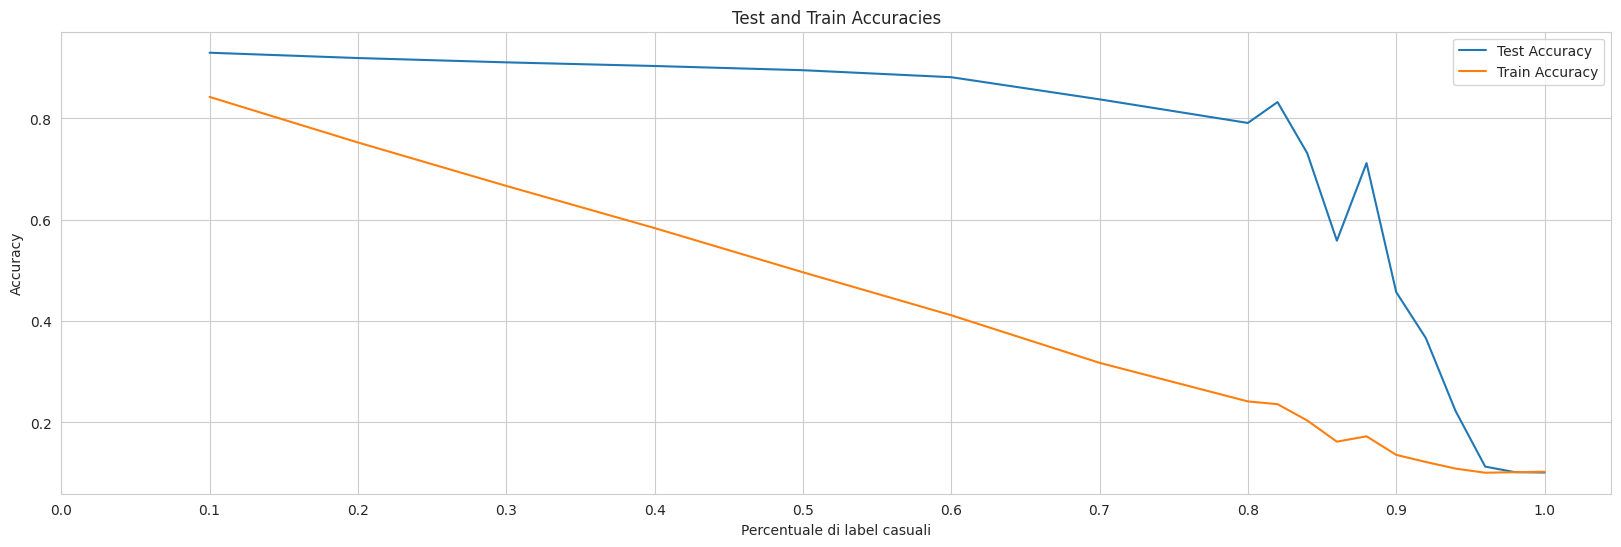

In [31]:
import matplotlib.pyplot as plt

# Plot the test accuracies and training accuracies
plt.figure(figsize=(20, 6))

plt.plot(sizes, test_accuracies, label='Test Accuracy')
plt.plot(sizes, last_train_acc, label='Train Accuracy')
plt.title('Test and Train Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Percentuale di label casuali')
#make the x-axis with more ticks
plt.xticks(np.arange(0, 1.1, 0.1))
plt.legend()

In [32]:
model.summary()

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_40 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,882 (93.29 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,922 (62.20 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step


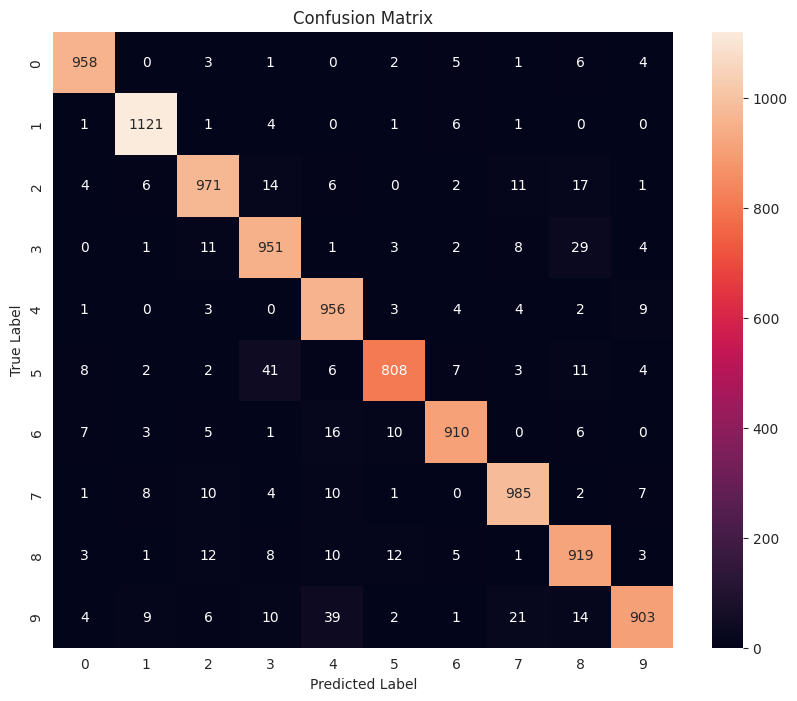

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the values from the validation dataset
Y_pred = model.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

# plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()